Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.11 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.39 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.14 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.42 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.07 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.12 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.34 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.34 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.71 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.05 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(3,1,1)(0,1,0

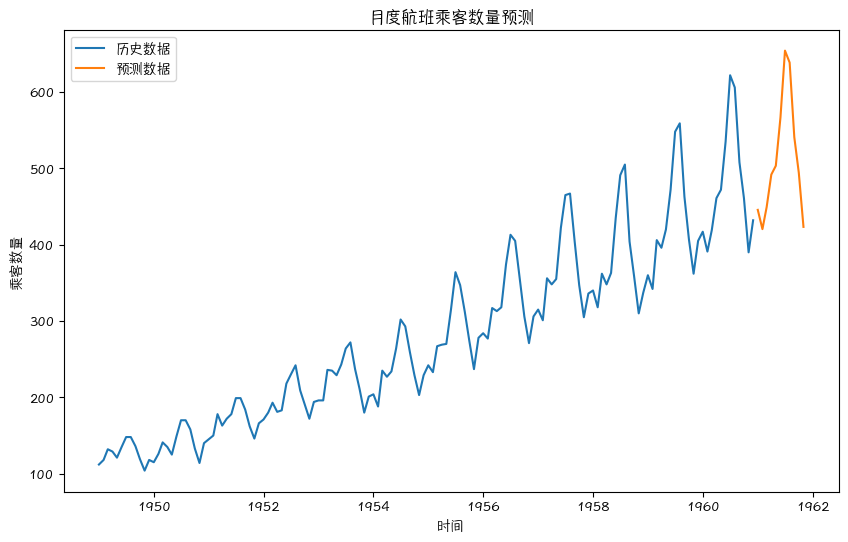

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

from matplotlib import rcParams
from matplotlib import font_manager


# 设置苹果系统的中文字体
rcParams['font.family'] = ['Hannotate SC','Hiragino Sans GB']
rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题


from pmdarima import auto_arima

# 加载示例数据集（使用本地假设数据）
data = {
    'Month': pd.date_range(start='1949-01', periods=144, freq='MS'),
    'Passengers': [
        112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126, 141, 135, 125, 149,
        170, 170, 158, 133, 114, 140, 145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
        171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235, 229, 243,
        264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229,
        242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374,
        413, 405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336,
        340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472,
        548, 559, 463, 407, 362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432
    ]
}
df = pd.DataFrame(data)
df.set_index('Month', inplace=True)

# # 绘制时间序列图
# plt.figure(figsize=(10, 6))
# plt.plot(df, label='月度航班乘客数量')
# plt.title('月度航班乘客数量时间序列')
# plt.xlabel('时间')
# plt.ylabel('乘客数量')
# plt.legend()
# plt.show()

# 使用 auto_arima 自动选择最佳 ARIMA 模型参数
model = auto_arima(df['Passengers'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
print(model.summary())

# 拟合模型并进行预测
model.fit(df['Passengers'])
forecast = model.predict(n_periods=12)
forecast_index = pd.date_range(start=df.index[-1], periods=12, freq='MS')
forecast_values = pd.Series(forecast, index=forecast_index)

# 绘制预测结果
plt.figure(figsize=(10, 6))
plt.plot(df, label='历史数据')
plt.plot(forecast_values, label='预测数据')
plt.title('月度航班乘客数量预测')
plt.xlabel('时间')
plt.ylabel('乘客数量')
plt.legend()

plt.savefig('time-series-analysis.svg', format='svg', transparent=True)
plt.show()
